# KNN Classifier (Mask, No Mask, Incorrect Mask)

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import packages
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA # Dimensionality Reduction

import seaborn as sns # for confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to plot inage, graph

import pickle
import time # for computation time assessment
%matplotlib inline

## Prepare Dataset

In [ ]:
# %cd /content/drive/MyDrive/Face-Mask-Dataset

%cd /content/drive/MyDrive/data-face-mask/Face-Mask-Dataset

/content/drive/MyDrive/data-face-mask/Face-Mask-Dataset


### Pickle Dataset

In [ ]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

pickle_in = open("data.pickle", "rb")
data = pickle.load(pickle_in) # Data Matrix will serve as X

### Dataset Classification Distribution

In [ ]:
# CLASS 0: NO MASK
# CLASS 1: INCORRECT WEAR OF MASK
# CLASS 2: CORRECT WEAR OF MASK

print('# of Samples:', len(y))
print('# of Without A Mask:', (y == 0).sum())
print('# of Incorrectly Worn Mask:', (y == 1).sum())
print('# of With A Mask:', (y == 2).sum())

# of Samples: 17836
# of Without A Mask: 5909
# of Incorrectly Worn Mask: 6044
# of With A Mask: 5883


### Convert Numpy to Dataframe

In [ ]:
# Get Column Names
cols = []
for i in range(0, len(data[0])):
    cols.append("P" + str(i))

# Convert to Dataframe
numpy_data = data
X = pd.DataFrame(data=numpy_data, columns=[cols])
print(X.head())

y = pd.DataFrame(data=y, columns=["Mask_Target"])
print(y.head())

    P0   P1   P2   P3   P4   P5   P6  ... P4089 P4090 P4091 P4092 P4093 P4094 P4095
0  147  148  147  146  146  146  145  ...   158   162   147   151   138   155   154
1  244  215  196  173  139  141  132  ...   181   165   160   168   164   159   146
2   90   93   90   93   85   80   75  ...    93    99   136    86    35    29    34
3   79   79   81   82   81   86   85  ...   245   240   241   240   237   232   227
4  128  115  107  137  101   88   79  ...    82    71    66    78    79    96    74

[5 rows x 4096 columns]
   Mask_Target
0            0
1            0
2            0
3            0
4            0


### Data Shape

In [ ]:
# Shape
print('\nImage Data Shape:', X.shape)
print('Image Data Shape Features:', data.shape)
print('Image Data Shape Target:', y.shape)


Image Data Shape: (17836, 4096)
Image Data Shape Features: (17836, 4096)
Image Data Shape Target: (17836, 1)


### Normalize the Data

In [ ]:
# Normalize the pixel values
X = X / 255.0

In [ ]:
X

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,...,P4056,P4057,P4058,P4059,P4060,P4061,P4062,P4063,P4064,P4065,P4066,P4067,P4068,P4069,P4070,P4071,P4072,P4073,P4074,P4075,P4076,P4077,P4078,P4079,P4080,P4081,P4082,P4083,P4084,P4085,P4086,P4087,P4088,P4089,P4090,P4091,P4092,P4093,P4094,P4095
0,0.576471,0.580392,0.576471,0.572549,0.572549,0.572549,0.568627,0.568627,0.564706,0.556863,0.564706,0.552941,0.541176,0.556863,0.505882,0.407843,0.298039,0.290196,0.301961,0.298039,0.423529,0.490196,0.474510,0.494118,0.447059,0.447059,0.494118,0.380392,0.309804,0.313725,0.266667,0.247059,0.203922,0.239216,0.282353,0.317647,0.341176,0.447059,0.541176,0.537255,...,0.211765,0.298039,0.349020,0.454902,0.482353,0.494118,0.501961,0.525490,0.521569,0.537255,0.533333,0.474510,0.466667,0.368627,0.278431,0.227451,0.211765,0.443137,0.541176,0.600000,0.600000,0.631373,0.603922,0.619608,0.588235,0.560784,0.549020,0.498039,0.435294,0.341176,0.419608,0.549020,0.600000,0.619608,0.635294,0.576471,0.592157,0.541176,0.607843,0.603922
1,0.956863,0.843137,0.768627,0.678431,0.545098,0.552941,0.517647,0.611765,0.635294,0.698039,0.709804,0.686275,0.760784,0.831373,0.772549,0.752941,0.760784,0.764706,0.607843,0.388235,0.435294,0.596078,0.701961,0.713725,0.674510,0.807843,0.866667,0.894118,0.725490,0.756863,0.850980,0.741176,0.807843,0.835294,0.890196,0.886275,0.894118,0.913725,0.898039,0.850980,...,0.941176,0.933333,0.898039,0.894118,0.749020,0.701961,0.717647,0.756863,0.752941,0.737255,0.737255,0.741176,0.752941,0.733333,0.737255,0.709804,0.600000,0.450980,0.337255,0.372549,0.368627,0.368627,0.396078,0.427451,0.423529,0.388235,0.356863,0.282353,0.211765,0.572549,0.596078,0.698039,0.611765,0.709804,0.647059,0.627451,0.658824,0.643137,0.623529,0.572549
2,0.352941,0.364706,0.352941,0.364706,0.333333,0.313725,0.294118,0.286275,0.231373,0.196078,0.254902,0.384314,0.431373,0.470588,0.482353,0.494118,0.521569,0.529412,0.568627,0.584314,0.584314,0.611765,0.619608,0.635294,0.631373,0.635294,0.666667,0.650980,0.666667,0.682353,0.662745,0.654902,0.647059,0.639216,0.635294,0.639216,0.650980,0.650980,0.643137,0.631373,...,0.501961,0.517647,0.501961,0.541176,0.603922,0.643137,0.635294,0.596078,0.568627,0.552941,0.600000,0.650980,0.662745,0.643137,0.607843,0.549020,0.486275,0.435294,0.317647,0.313725,0.376471,0.427451,0.435294,0.380392,0.368627,0.403922,0.403922,0.403922,0.486275,0.411765,0.400000,0.486275,0.427451,0.364706,0.388235,0.533333,0.337255,0.137255,0.113725,0.133333
3,0.309804,0.309804,0.317647,0.321569,0.317647,0.337255,0.333333,0.235294,0.184314,0.117647,0.141176,0.270588,0.376471,0.450980,0.580392,0.658824,0.741176,0.772549,0.784314,0.792157,0.811765,0.847059,0.870588,0.858824,0.866667,0.870588,0.862745,0.870588,0.870588,0.854902,0.854902,0.858824,0.835294,0.835294,0.839216,0.835294,0.819608,0.819608,0.835294,0.835294,...,0.380392,0.372549,0.368627,0.376471,0.400000,0.403922,0.411765,0.423529,0.447059,0.466667,0.482353,0.501961,0.549020,0.513725,0.243137,0.023529,0.007843,0.007843,0.007843,0.007843,0.007843,0.003922,0.003922,0.023529,0.086275,0.113725,0.070588,0.098039,0.164706,0.145098,0.141176,0.611765,0.929412,0.960784,0.941176,0.945098,0.941176,0.929412,0.909804,0.890196
4,0.501961,0.450980,0.419608,0.537255,0.396078,0.345098,0.309804,0.368627,0.376471,0.345098,0.403922,0.470588,0.478431,0.525490,0.596078,0.619608,0.670588,0.705882,0.682353,0.698039,0.713725,0.745098,0.745098,0.745098,0.741176,0.760784,0.752941,0.760784,0.760784,0.643137,0.603922,0.682353,0.658824,0.647059,0.682353,0.682353,0.674510,0.654902,0.662745,0.666667,...,0.658824,0.682353,0.694118,0.686275,0.674510,0.690196,0.725490,0.749020,0.760784,0.745098,0.686275,0.694118,0.666667,0.631373,0.564706,0.517647,0.482353,0.309804,0.207843,0.066667,0.054902,0.066667,0.109804,0.105882,0.109804,0.121569,0.121569,0.219608,0.243137,0.298039,0.290196,0.305882,0.313725,0.321569,0.278431,0.258824,0.305882,0.

In [ ]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


### Split Train + Test, random_state

In [ ]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ', len(X_train), '\nLength of our Testing data: ', len(X_test))

Length of our Training data:  14268 
Length of our Testing data:  3568


## KNN No Hyperparameter Tuning
Xây dựng và đào tạo mô hình KNN với các tham số mặc định


In [ ]:
# Initialize KNN model
knn = KNeighborsClassifier()

# Use training data to fit KNN model
knn.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KNeighborsClassifier()

In [ ]:
%%time
# make prediction on entire test data
predictions_set1 = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


CPU times: user 22.8 s, sys: 1.25 s, total: 24.1 s
Wall time: 20.3 s


In [ ]:
predictions_set1

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
# Save Predictions in a pickle
# pickle_out = open("predictions_set1.pickle", "wb")
# pickle.dump(predictions_set1, pickle_out)
# pickle_out.close()

## Performance Metrics for No Hyperparameter Tuning

#### Accuracy

In [ ]:
# 75-82% accuracy depending on the divide
print('KNN Accuracy: %.3f' % accuracy_score(y_test, predictions_set1))

KNN Accuracy: 0.767


#### Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.7668161434977578')

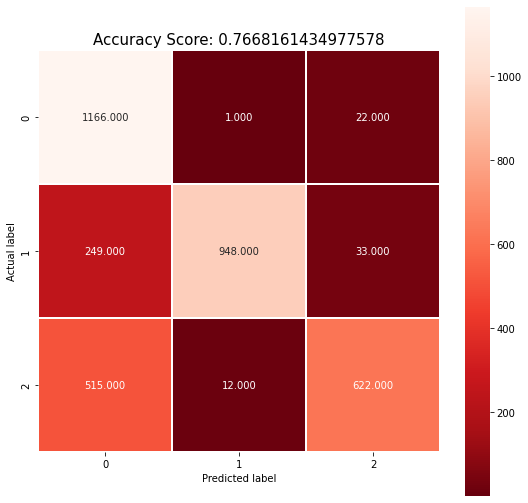

In [ ]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions_set1)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_set1))
plt.title(all_sample_title,size=15)

### Precision, Recall, F1 Score & Classification Report, No Hyperparameter Tuning

In [ ]:
print('KNN Precision: %.3f' % precision_score(y_test, predictions_set1, average='macro'))
print('KNN Recall: %.3f' % recall_score(y_test, predictions_set1, average='macro'))
print('KNN F1 Score: %.3f' % f1_score(y_test, predictions_set1, average='macro'))
print("\nNo Hyperparameter Tuning Classification Report\n", classification_report(y_test, predictions_set1))

KNN Precision: 0.836
KNN Recall: 0.764
KNN F1 Score: 0.765

No Hyperparameter Tuning Classification Report
               precision    recall  f1-score   support

           0       0.60      0.98      0.75      1189
           1       0.99      0.77      0.87      1230
           2       0.92      0.54      0.68      1149

    accuracy                           0.77      3568
   macro avg       0.84      0.76      0.76      3568
weighted avg       0.84      0.77      0.77      3568



## Dimensionality Reduction - Giảm chiều dữ liệu 

### Principal Component Analysis, Keep 90% of variance

In [ ]:
# Dimensionality Reduction with Principal Component Analysis (PCA)
pca = PCA(0.90) # Preserve 90% of the variance

X_transformed = pca.fit_transform(X_train) # Fit the pca transform with X_train
X_test_transformed = pca.transform(X_test) # Apply transform to X_test

# Training set shape after Principal Component Analysis form
print(X_transformed.shape)

# Original Training Set Shape
# Notice we lose 3,943 features using PCA, while preserving 90% variance
print(X_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


(14268, 154)
(14268, 4096)


In [ ]:
# Initialize KNN model for PCA instance
knn_pca = KNeighborsClassifier()

# Use training data to fit KNN model with transformed X_train
knn_pca.fit(X_transformed, y_train.values.ravel())

KNeighborsClassifier()

In [ ]:
%%time
# make prediction on entire train data
predictions_set_pca = knn_pca.predict(X_transformed)
print("Accuracy Train PCA:", accuracy_score(y_train, predictions_set_pca))

Accuracy Train PCA: 0.8919960751331651
CPU times: user 7.5 s, sys: 746 ms, total: 8.24 s
Wall time: 6.11 s


In [ ]:
%%time
# make prediction on entire test data
predictions_set_pca = knn_pca.predict(X_test_transformed)
print("Accuracy test PCA:", accuracy_score(y_test, predictions_set_pca))

Accuracy test PCA: 0.852017937219731
CPU times: user 1.93 s, sys: 119 ms, total: 2.05 s
Wall time: 1.48 s



 PCA Classification Report
               precision    recall  f1-score   support

           0       0.72      0.98      0.83      1189
           1       0.97      0.92      0.94      1230
           2       0.94      0.65      0.77      1149

    accuracy                           0.85      3568
   macro avg       0.88      0.85      0.85      3568
weighted avg       0.88      0.85      0.85      3568



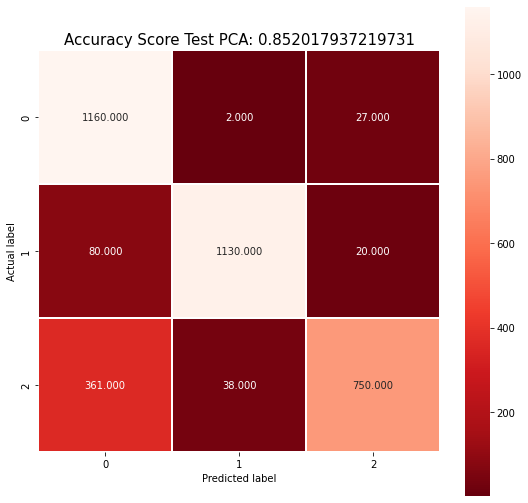

In [ ]:
# Calculate Confusion Matrix for PCA
cm = confusion_matrix(y_test, predictions_set_pca)

plt.figure(figsize=(9,9))

# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score Test PCA: {0}'.format(accuracy_score(y_test, predictions_set_pca))
plt.title(title,size=15)

print("\n PCA Classification Report\n", classification_report(y_test, predictions_set_pca))

## KNN Hyperparameter Tuning with GridSearchCV

In [ ]:
# New KNN instance model
knn = KNeighborsClassifier()

# Dictionary of parameter values we are testing performance for
param_grid = {'n_neighbors': [5, 7, 9, 11], 'p': [2, 4, 6, 8, 10, 20, 50], 'metric': ['euclidean', 'manhattan', 'minkowski']}

# Test all parameter combinations in param_grid
knn_gscv = GridSearchCV(knn, param_grid, scoring='f1_micro', cv=5, verbose=3, n_jobs=-1)

In [ ]:
# Fit model to data
knn_gscv.fit(X_train, y_train.values.ravel())

In [ ]:
# Get GridSearchCV's top performing parameters and score

# Best Params: n_neighbors=5, distance=manhattan, p=2
best_params_ = knn_gscv.best_params_

# Best Score 82.7%
knn_gscv.best_score_

## KNN Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
# Parameter values that should be tested
k_range = list(range(1,21))
metric = ['manhattan'] # Manhattan distance outperformed Euclidean in GridSearch, so we exclude it here
options = ['uniform', 'distance']

# Set parameter grid respectively
param_grid = dict(n_neighbors=k_range, metric=metric, weights=options)

In [ ]:
# Notes on RandomizedSearchCV parameters
    # n_iter: Number of random combinations it would try
    # random_state: Reproducibility/ Set seed

# Initialize new KNN model
knn_rand = KNeighborsClassifier()

# Initialize Randomized Search with params
# Cross Validation is 10
rand = RandomizedSearchCV(knn_rand, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)

# Fit Randomized Search with the training data
rand.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
rand.best_params_ 
# {'weights': 'distance', 'n_neighbors': 2, 'metric': 'manhattan'}

In [ ]:
rand.best_score_ 
# 0.8652206356425648

In [ ]:
# Initial Randomized Search CV result Before Normalization
# 0.7488861511088009
# {'weights': 'distance', 'n_neighbors': 10}

## Performance of Best Params

In [ ]:
best_params = {'weights': 'distance', 'n_neighbors': 2, 'metric': 'manhattan'}

In [ ]:
# create new a knn model with best params
b_knn = KNeighborsClassifier(**best_params)

#fit model to data
b_knn.fit(X_train, y_train.values.ravel())

# make prediction on entire test data
train_pred = b_knn.predict(X_train)

# make prediction on entire test data
y_pred = b_knn.predict(X_test)

print('Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
print('Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Accuracy Train: 1.000
Accuracy Test: 0.886

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      1189
           1       0.99      0.86      0.92      1230
           2       0.92      0.83      0.87      1149

    accuracy                           0.89      3568
   macro avg       0.90      0.89      0.89      3568
weighted avg       0.90      0.89      0.89      3568



Text(0.5, 1.0, 'Accuracy Score Best Params: 0.8856502242152466')

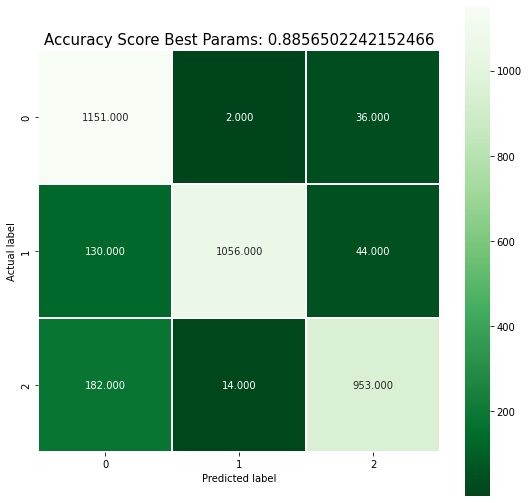

In [ ]:
# Calculate Confusion Matrix for Best Param Model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score Best Params: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(title,size=15)

## Dimensionality Reduction [Best Params]

### Principal Component Analysis, Keep 90% of variance [Best Params]

In [ ]:
# Dimensionality Reduction with Principal Component Analysis (PCA)
pca = PCA(0.90) # Preserve 90% of the variance

X_transformed = pca.fit_transform(X_train) # Fit the pca transform with X_train
X_test_transformed = pca.transform(X_test) # Apply transform to X_test

# Training set shape after Principal Component Analysis form
print(X_transformed.shape)

# Original Training Set Shape
# Notice we lose 3,943 features using PCA, while preserving 90% variance
print(X_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


(14268, 154)
(14268, 4096)


In [ ]:
# Initialize KNN model for PCA instance
knn_pca = KNeighborsClassifier(**best_params)

# Use training data to fit KNN model with transformed X_train
knn_pca.fit(X_transformed, y_train.values.ravel())

KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')

In [ ]:
%%time
# make prediction on entire train data
predictions_set_pca = knn_pca.predict(X_transformed)
print("Accuracy Train PCA:", accuracy_score(y_train, predictions_set_pca))

Accuracy Train PCA: 1.0
CPU times: user 17.7 s, sys: 128 ms, total: 17.8 s
Wall time: 17.7 s


In [ ]:
%%time
# make prediction on entire test data
predictions_set_pca = knn_pca.predict(X_test_transformed)
print("Accuracy Train PCA:", accuracy_score(y_test, predictions_set_pca))

Accuracy Train PCA: 0.8276345291479821
CPU times: user 4.38 s, sys: 6.98 ms, total: 4.38 s
Wall time: 4.37 s


### PCA Classification Report [Best Params]


 PCA Classification Report
               precision    recall  f1-score   support

           0       0.69      0.97      0.80      1189
           1       0.98      0.81      0.89      1230
           2       0.91      0.70      0.79      1149

    accuracy                           0.83      3568
   macro avg       0.86      0.83      0.83      3568
weighted avg       0.86      0.83      0.83      3568



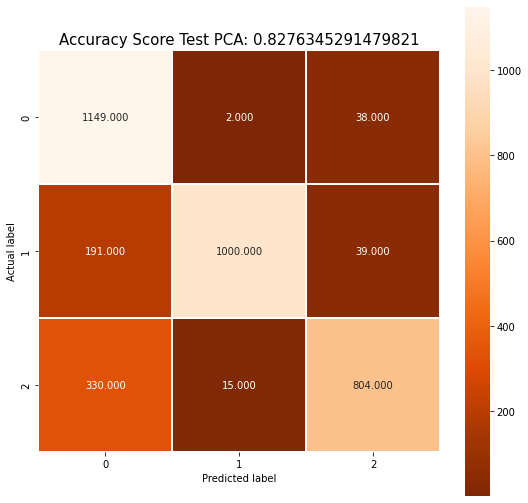

In [ ]:
# Calculate Confusion Matrix for 
cm = confusion_matrix(y_test, predictions_set_pca)

plt.figure(figsize=(9,9))

# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Oranges_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score Test PCA: {0}'.format(accuracy_score(y_test, predictions_set_pca))
plt.title(title,size=15)

print("\n PCA Classification Report\n", classification_report(y_test, predictions_set_pca))

## Testing Model Bias 

Một bộ dữ liệu bên ngoài sẽ được dùng để kiểm tra và sử dụng làm dữ liệu kiểm tra cho mô hình.

- Test_bias (TB) dataset

In [ ]:
# Best Parameters for KNN Model
best_params = {'weights': 'distance', 'n_neighbors': 2, 'metric': 'manhattan'}

In [ ]:
# Load TB datasets
pickle_in = open("X_test_bias.pickle", "rb")
TB_X = pickle.load(pickle_in)
pickle_in = open("y_test_bias.pickle", "rb")
TB_y = pickle.load(pickle_in)

# TB target and feature set shape
print("Features, TB_X shape: ", TB_X.shape)
print("Target, TB_y shape: ", TB_y.shape)

# Normalize the pixel values
TB_X = TB_y / 255.0

In [ ]:
# Re-initialize KNN model with best params and fit it
knn_tb = KNeighborsClassifier(**best_params)
knn_tb.fit(X_train, y_train.values.ravel())

In [ ]:
# make prediction on the entire tb dataset
y_pred_tb = knn_tb.predict(TB_X)

In [ ]:
# Calculate Confusion Matrix
cm = confusion_matrix(TB_y, y_pred_tb)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'tb Accuracy Score: {0}'.format(accuracy_score(TB_y, y_pred_tb))
plt.title(title,size=15)

In [ ]:
print("\nClassification Report Best Params\n", classification_report(y_test, y_pred))
print("\nClassification Report tb Test Dataset\n", classification_report(TB_y, y_pred_tb))

## Conclusion

### Bias Evaluation


Các nguồn được tham khảo để xây dựng mô hình này:
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

### Saving & Exporting KNN model for future use

In [ ]:
# NAME OF MODEL
filename = 'knn-face-mask-detection-model.pkl'

# EXPORT AND SAVE MODEL 
pickle.dump(b_knn, open(filename, 'wb'))